In [35]:
import numpy as np
import pandas as pd
import scipy.io as sio
import zipfile
import os
import gdown
from scipy.stats import levene, shapiro, mannwhitneyu
import matplotlib.pyplot as plt

In [36]:
# Archivo en Google Drive
file_id = "1bfkHsdk1elkLlzb85elOan7P3M8p6gK8"
url = f"https://drive.google.com/uc?export=download&id={file_id}"
zip_path = 'datos_senales_datos_parkinson_cursos.zip'

# Descargar si no existe
if not os.path.exists(zip_path):
    gdown.download(url, zip_path, quiet=False)

# Extraer ZIP
if not os.path.exists('datos'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('datos')


# Rutas archivos
ruta_control = 'datos/control'
ruta_parkinson = 'datos/parkinson'
variables = ruta_control[0]

# Verifica lo que hay en la carpeta datos
dc=os.listdir(ruta_control)
print("\nCantidad de archivos en control:", len(dc))
print("Tipo de archivo del primer elemento:", dc[0])
dp=os.listdir(ruta_parkinson)
print("\nCantidad de archivos en parkinson:", len(dp))
print("Tipo de archivo del primer elemento:", dp[0])

#variables
archivo = dc[0]  # El primer nombre de archivo
ruta_completa = os.path.join(ruta_control, archivo)
variables = sio.loadmat(ruta_completa)  # Ahora sí es un dict
print("\nVariables del archivo control:\n", variables.keys())

# Dimensión:
array = variables['data']  # o el nombre correcto que aparezca
print("\nDimension:\n",array.shape)

# Tamaño:
print("\nTamaño: " + str(array.size))




Cantidad de archivos en control: 36
Tipo de archivo del primer elemento: C001R_EP_reposo.mat

Cantidad de archivos en parkinson: 23
Tipo de archivo del primer elemento: P001_EP_reposo.mat

Variables del archivo control:
 dict_keys(['__header__', '__version__', '__globals__', 'data'])

Dimension:
 (8, 2000, 180)

Tamaño: 2880000


In [37]:
# Cargar los datos de control y parkinson
datos_control = []
for archivo in os.listdir(ruta_control):
    if archivo.endswith('.mat'):
        ruta = os.path.join(ruta_control, archivo)
        datos = sio.loadmat(ruta)
        datos_control.append(datos)

datos_parkinson = []
for archivo in os.listdir(ruta_parkinson):
    if archivo.endswith('.mat'):
        ruta = os.path.join(ruta_parkinson, archivo)
        datos = sio.loadmat(ruta)
        datos_parkinson.append(datos)

# Función para el calculo de la energia para cada sujeto
def energia_por_sujeto(senal, nombre_variable='data'):
    energia_total = []
    for sujeto in senal:
        senal = sujeto[nombre_variable]  # Extraer la señal
        
        # Calculo energía promedio por canal
        energia_epoca = np.sum(senal ** 2, axis=2)  # Suma por muestras muestras
        energia_promedio = np.mean(energia_epoca, axis=1)  # Promedio por época
        energia_total.append(energia_promedio) # Energia total

    # Convertir a DataFrame: columna (canal), fila(sujeto)
    df = pd.DataFrame(energia_total)
    df.columns = [f'canal_{i+1}' for i in range(df.shape[1])]
    df.index.name = '#sujeto'

    return df

df_control = energia_por_sujeto(datos_control, nombre_variable='data')
df_parkinson = energia_por_sujeto(datos_parkinson, nombre_variable='data')


print("CONTROL:")
print(df_control.head())

print("\nPARKINSON:")
print(df_parkinson.head())


CONTROL:
             canal_1      canal_2      canal_3      canal_4      canal_5  \
#sujeto                                                                    
0        1931.908532  1888.731712  2048.413463  1665.507626  2675.714672   
1        1405.043452  1550.367302  1830.834467  1729.587202  1467.750422   
2        1032.853152  1334.731976  2098.745047  1041.763064  2101.483556   
3        2630.691976  2601.293108  2890.631963  2639.313819  2674.957729   
4        1554.909718  1658.033108  1756.590591  1833.573369  1961.567383   

             canal_6      canal_7      canal_8  
#sujeto                                         
0        2271.974227  2050.319483  2219.273956  
1        8262.676313  5883.899672  6660.291077  
2        1070.283495  1163.631249  1423.492602  
3        7941.560547  7962.975409  8382.795922  
4        4459.229020  3149.661688  3617.636022  

PARKINSON:
             canal_1      canal_2      canal_3      canal_4      canal_5  \
#sujeto                    


Canal: canal_1
Shapiro-Wilk - Grupo 1: p-valor=0.0187 No normal
Shapiro-Wilk - Grupo 2: p-valor=0.0102 No normal

Canal: canal_2
Shapiro-Wilk - Grupo 1: p-valor=0.0175 No normal
Shapiro-Wilk - Grupo 2: p-valor=0.0042 No normal

Canal: canal_3
Shapiro-Wilk - Grupo 1: p-valor=0.0148 No normal
Shapiro-Wilk - Grupo 2: p-valor=0.0031 No normal

Canal: canal_4
Shapiro-Wilk - Grupo 1: p-valor=0.0008 No normal
Shapiro-Wilk - Grupo 2: p-valor=0.0005 No normal

Canal: canal_5
Shapiro-Wilk - Grupo 1: p-valor=0.0038 No normal
Shapiro-Wilk - Grupo 2: p-valor=0.0023 No normal

Canal: canal_6
Shapiro-Wilk - Grupo 1: p-valor=0.0000 No normal
Shapiro-Wilk - Grupo 2: p-valor=0.0000 No normal

Canal: canal_7
Shapiro-Wilk - Grupo 1: p-valor=0.0000 No normal
Shapiro-Wilk - Grupo 2: p-valor=0.0000 No normal

Canal: canal_8
Shapiro-Wilk - Grupo 1: p-valor=0.0000 No normal
Shapiro-Wilk - Grupo 2: p-valor=0.0000 No normal


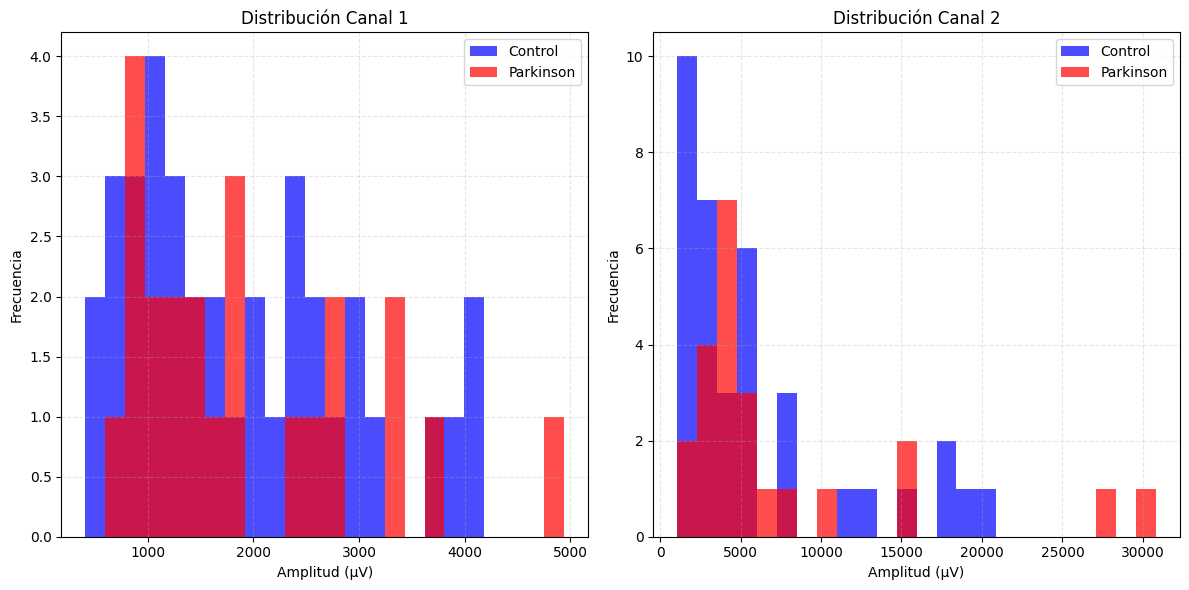

In [ ]:
# Prueba de normalidad
# Se crea DataFrames con etiquetas de grupo para que en el mismo canal esten parkinson y control
df_control['grupo'] = 'Control'
df_parkinson['grupo'] = 'Parkinson'
# Combinamos ambos DataFrames para facilitar el análisis de cada canal
df_completo = pd.concat([df_control, df_parkinson])
# Lista de canales
canales = [f'canal_{i+1}' for i in range(df_control.shape[1])]

# Función de normalidad
def verificar_normalidad(grupo1, grupo2, alpha=0.05):
    _, p1 = shapiro(grupo1)
    _, p2 = shapiro(grupo2)
    normalidad = (p1 > alpha) and (p2 > alpha)
    print(f"Shapiro-Wilk - Grupo 1: p-valor={p1:.4f}", "Normal" if p1 > alpha else "No normal")
    print(f"Shapiro-Wilk - Grupo 2: p-valor={p2:.4f}", "Normal" if p2 > alpha else "No normal")

    return normalidad

# Utilizamos la función para que recorra cada canal
for canal in [col for col in df_control.columns if col.startswith('canal_')]:
    print(f"\nCanal: {canal}")
    verificar_normalidad(df_control[canal], df_parkinson[canal])


# Grafica histogramas de dos canales para ver normalidad
# Configuración
canales_seleccionados = ['canal_1', 'canal_2'] 
n_bins = 25 # cantidad de barras
colors = ['blue', 'red']  # Control azul, Parkinson rojo

plt.figure(figsize=(12, 6))
# Primer canal
plt.subplot(1, 2, 1)
control_data = df_control['canal_1'].dropna()
parkinson_data = df_parkinson['canal_1'].dropna()
bins = np.linspace(
    min(control_data.min(), parkinson_data.min()),
    max(control_data.max(), parkinson_data.max()),
    n_bins
)

plt.hist(control_data, bins=bins, alpha=0.7, color=colors[0], label='Control')
plt.hist(parkinson_data, bins=bins, alpha=0.7, color=colors[1], label='Parkinson')
plt.title('Distribución Canal 1')
plt.xlabel('Amplitud (μV)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

# Segundo canal
plt.subplot(1, 2, 2)
control_data = df_control['canal_2'].dropna()
parkinson_data = df_parkinson['canal_2'].dropna()
bins = np.linspace(
    min(control_data.min(), parkinson_data.min()),
    max(control_data.max(), parkinson_data.max()),
    n_bins
)

plt.hist(control_data, bins=bins, alpha=0.7, color=colors[0], label='Control')
plt.hist(parkinson_data, bins=bins, alpha=0.7, color=colors[1], label='Parkinson')
plt.title('Distribución Canal 2')
plt.xlabel('Amplitud (μV)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Canal: canal_1
Levene - p-valor=0.9132 Homocedástico

Canal: canal_2
Levene - p-valor=0.6417 Homocedástico

Canal: canal_3
Levene - p-valor=0.6404 Homocedástico

Canal: canal_4
Levene - p-valor=0.4720 Homocedástico

Canal: canal_5
Levene - p-valor=0.6807 Homocedástico

Canal: canal_6
Levene - p-valor=0.5090 Homocedástico

Canal: canal_7
Levene - p-valor=0.6676 Homocedástico

Canal: canal_8
Levene - p-valor=0.6409 Homocedástico


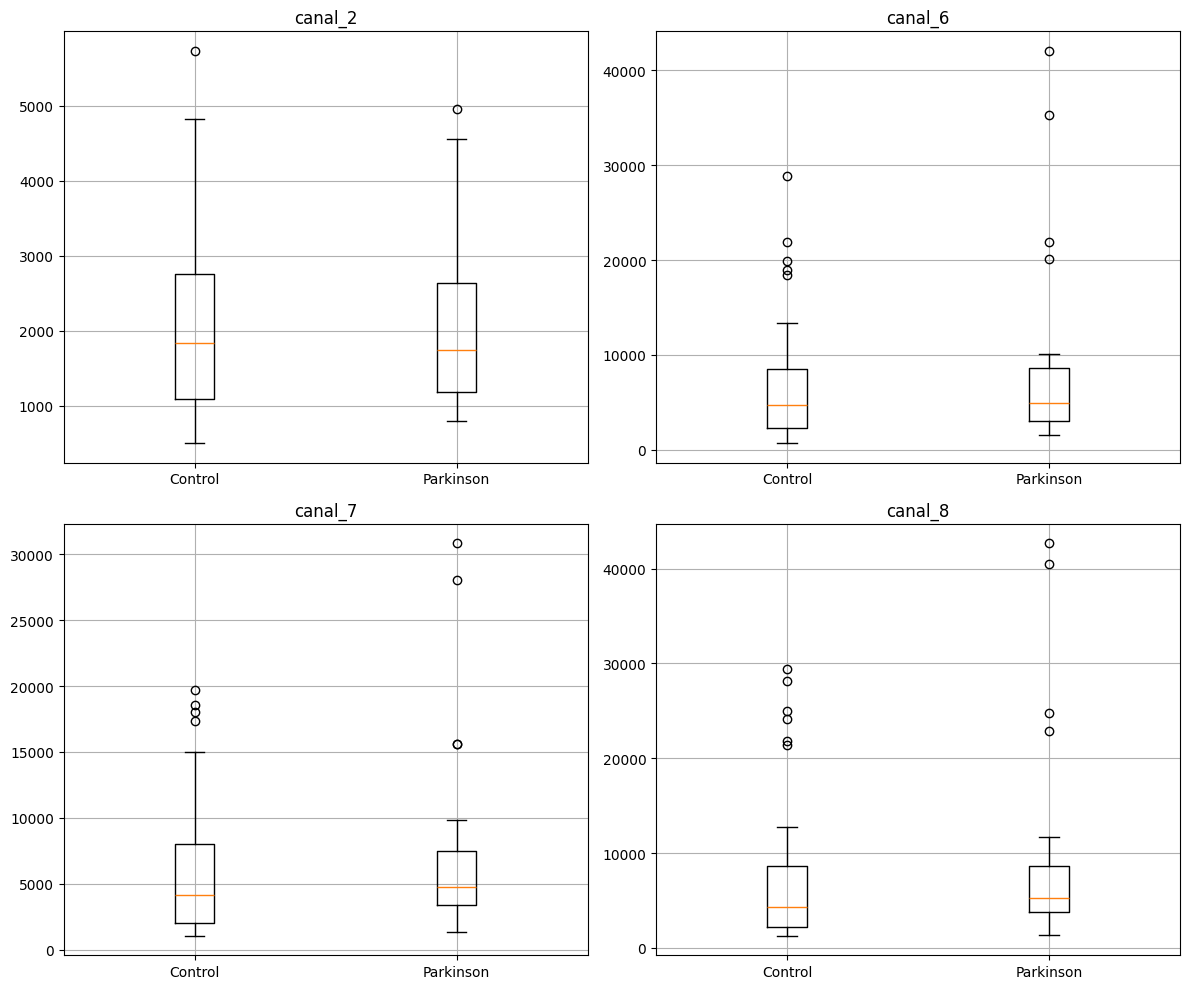

In [39]:
# Prueba de homocedasticidad (Levene)
def homocedasticidad(grupo1, grupo2, alpha=0.05):
    _, p = levene(grupo1, grupo2)
    homocedasticidad = p > alpha
    print(f"Levene - p-valor={p:.4f}", "Homocedástico" if p > alpha else "No Homocedástico")
    return homocedasticidad

# Utilizamos la función para que recorra cada canal
for canal in [col for col in df_control.columns if col.startswith('canal_')]:
    print(f"\nCanal: {canal}")
    homocedasticidad(df_control[canal], df_parkinson[canal])

# Boxplots para los primeros 4 canales
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
canales = ['canal_2', 'canal_6', 'canal_7', 'canal_8']
# Recorremos cada canal
for ax, canal in zip(axes.flatten(), canales):
    ax.boxplot([df_control[canal].dropna(), df_parkinson[canal].dropna()])
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Control', 'Parkinson'])
    ax.set_title(canal)
    ax.grid(True)

plt.tight_layout()
plt.show()



In [ ]:
# Prueba U Mann-Whitney (no paramétrica)
def mann(df_control, df_parkinson, alpha=0.05):
    # Filtrar solo columnas numéricas en ambos DataFrames
    cols_numericas = [
        col for col in df_control.columns 
        if pd.api.types.is_numeric_dtype(df_control[col]) and
           pd.api.types.is_numeric_dtype(df_parkinson[col])
    ]
    
    resultados = []
    for canal in cols_numericas:
        ctrl = df_control[canal].values
        park = df_parkinson[canal].values

        _, p = mannwhitneyu(ctrl, park)

        resultados.append({
            'canal': canal,
            'p_valor': p,
            'significativo': p <= alpha,
        })
    
    return resultados

resultados = mann(df_control, df_parkinson, alpha=0.05)

# Resultados
print("\nResultados del análisis Mann-Whitney U:")
# Recorremos cada canal
for res in resultados:
    print(f"\nCanal:  {res['canal']}")
    print(f"p-valor:  {res['p_valor']:.4f} {'(Significativo)' if res['significativo'] else '(No significativo)'}")




Resultados del análisis Mann-Whitney U:

Canal: canal_1
p-valor: 0.8581 (No significativo)

Canal: canal_2
p-valor: 0.9938 (No significativo)

Canal: canal_3
p-valor: 0.7149 (No significativo)

Canal: canal_4
p-valor: 0.6804 (No significativo)

Canal: canal_5
p-valor: 0.9442 (No significativo)

Canal: canal_6
p-valor: 0.4795 (No significativo)

Canal: canal_7
p-valor: 0.2941 (No significativo)

Canal: canal_8
p-valor: 0.3087 (No significativo)
